In [91]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [92]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [93]:
# copy to a new dataframe
df_gdp = dfLE.copy()
df_gdp.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,1.641579e+11,2.012120e+07,16.50625
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,2.901137e+09,1.015165e+06,11.78750
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,2.905302e+11,4.587010e+06,20.03750
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,2.259544e+11,6.474880e+06,15.38750
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,6.669684e+09,2.157370e+06,11.35000


In [94]:
#Part 1
df_gdp['GDP_capita'] = dfLE['GDP'] / dfLE['Population']
df_gdp['GDP_capita'].sample(10)

175     3331.124773
9       3091.580405
39      3428.897125
151      256.516755
105      685.958218
119             NaN
164    32350.966244
37              NaN
23              NaN
183     7304.866699
Name: GDP_capita, dtype: float64

In [95]:
# delete all NaN data in GDP_capita column.
df_gdp = df_gdp.dropna()
df_gdp.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,6.023285e+10,1.340066e+07,11.691823,5831.130877
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,1.506979e+11,3.972571e+07,3.006460,10101.737928
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,8.988098e+06,3.334250e+03,4.018750,117.466394
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,1.213512e+09,1.007302e+06,9.868750,685.958218
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,6.161290e+09,3.735507e+06,12.000000,2306.960717
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,2.698236e+10,1.124072e+07,13.725000,5490.517494
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,1.004677e+12,4.214677e+08,20.037500,63337.610450


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

<AxesSubplot:ylabel='Density'>

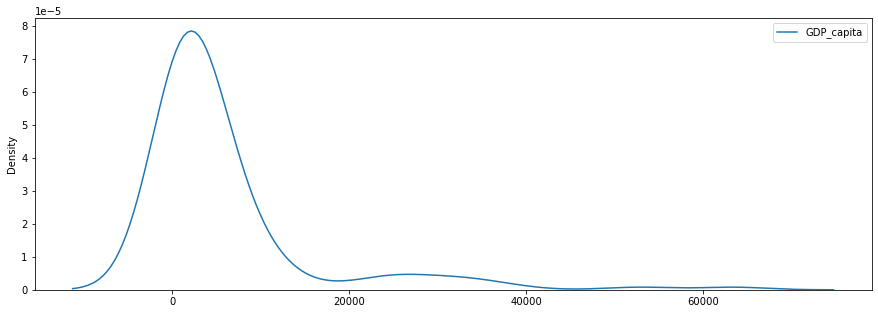

In [96]:
# visualization of KDE plot.
kde_capita = df_gdp[['GDP_capita']]
sns.kdeplot(data = kde_capita)


In [97]:
# create a function for all distributions
def all_graphs(df_name, column_name):
    data = pd.Series(df_name[column_name])
    hist = thinkstats2.Hist(data) 
    pmf = thinkstats2.Pmf(data) 
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.PrePlot(6, rows = 2, cols = 3) 
    thinkplot.Hist(hist) 
    thinkplot.SubPlot(2) 
    thinkplot.Pmf(pmf) 
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

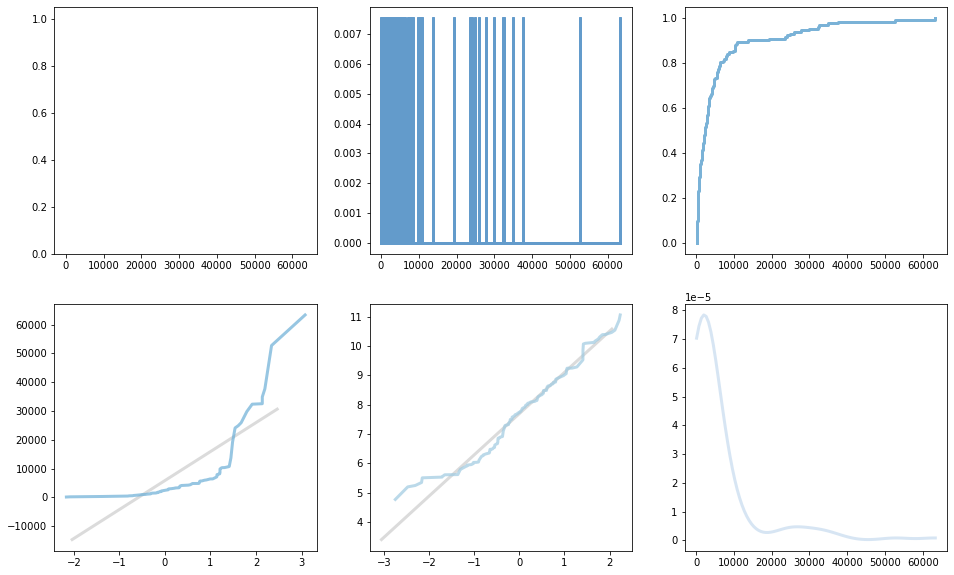

In [98]:
#graphing
all_graphs(df_gdp,'GDP_capita')

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [99]:
#Analytical for Schooling
# the mean is 11.69 and standard deviation is 3.00, which Schooling values are closer to the average.
df_schooling = pd.read_csv("led.csv")
df_schooling['Schooling'].describe()

count    2773.000000
mean       12.001442
std         3.344643
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


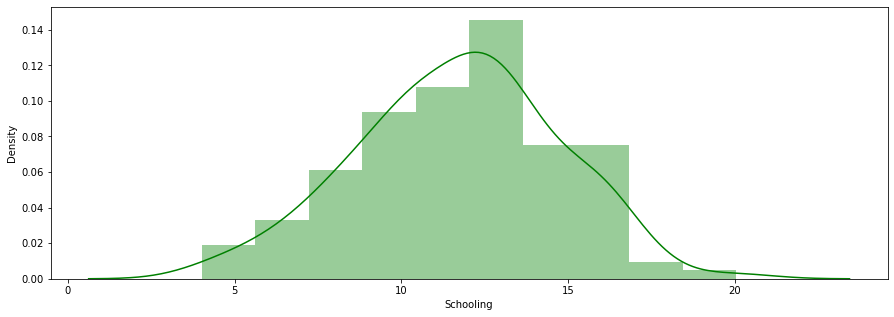

In [100]:
# visualizing the distribution.
sns.distplot(df_gdp['Schooling'], color = 'green', bins= 10)
plt.show()

In [101]:
# use the number of second quortile to draw 
dschool = df_gdp[df_gdp['Schooling'] > 12.0]
dnschool = df_gdp[df_gdp['Schooling'] < 12.0]

ds_life = dschool.Lifeexpectancy
dns_life = dnschool.Lifeexpectancy

In [102]:
#Get some basic schooling stats and save them in varaibles.
#mean, standard deviation, median, and count.
#  
mean_school = df_gdp['Schooling'].mean()
med_school = df_gdp['Schooling'].median()
std_school = df_gdp['Schooling'].std()
num_school = df_gdp['Schooling'].count()

print('mean: ', mean_school)
print('median: ', med_school)
print('std: ', std_school)
print('count: ', num_school)

mean:  11.691823308270681
median:  12.0
std:  3.0064598793967483
count:  133


<AxesSubplot:xlabel='Lifeexpectancy', ylabel='Density'>

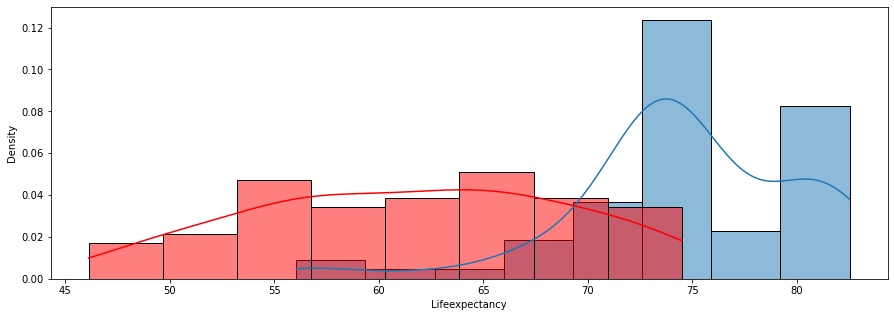

In [103]:
# Plot the emperical data with analytical distribution.
sns.histplot(ds_life, kde=True, stat='density')
sns.histplot(dns_life, kde=True, stat='density', color='red')

In [104]:
# create a new dataframe for schooling in Canada
df_schooling = pd.read_csv('led.csv')
df_schooling = df_schooling[['Country', 'Year', 'Schooling']]

In [105]:
filter = df_schooling['Country'] == 'Canada'
df_schooling[filter]

,Country,Year,Schooling
496,Canada,2015,16.3
497,Canada,2014,15.9
498,Canada,2013,15.9
499,Canada,2012,15.9
500,Canada,2011,15.9
501,Canada,2010,15.9
502,Canada,2009,15.9
503,Canada,2008,15.8
504,Canada,2007,15.8
505,Canada,2006,15.8


In [106]:
df_schooling[filter].count()

Country      16
Year         16
Schooling    16
dtype: int64

In [107]:
# the percentage of that have a schooling level within 1 year of Canada. 
percent_educate = df_schooling.mean() / 16 * 100
print('the precentage of schooling level of Canada: %.2f' % percent_educate['Schooling'], '%')

the precentage of schooling level of Canada: 75.01 %


C:\Users\Elsa\AppData\Local\Temp\ipykernel_7824\2352253575.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  percent_educate = df_schooling.mean() / 16 * 100


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

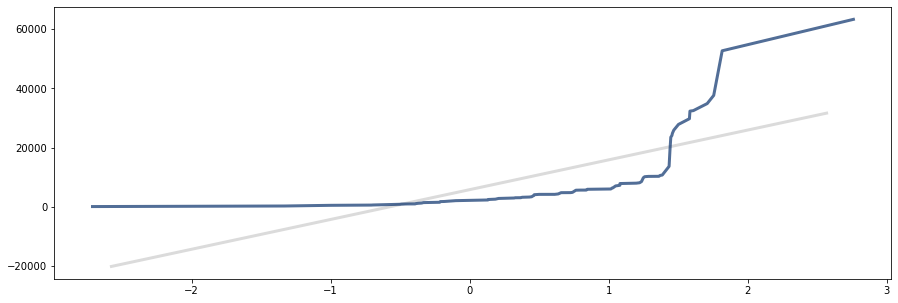

In [108]:
# Analytical for GDP/capita
# use Normal probability plot.
thinkstats2.NormalProbabilityPlot(df_gdp['GDP_capita'])


c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


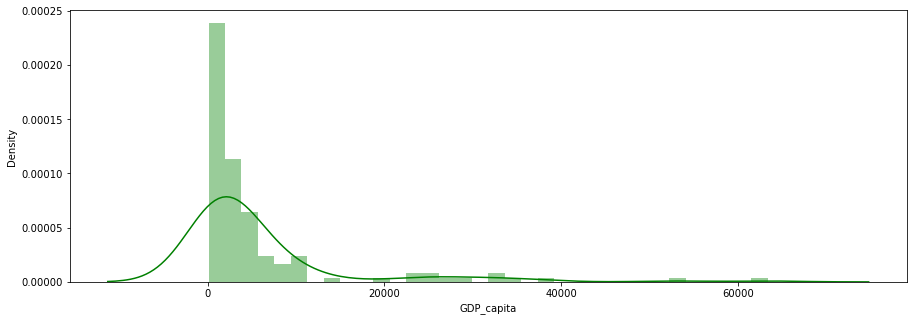

In [109]:
# the normal distribution should form almost a straight line. 
# departures from this line indicate departues from normality.

# use another analytical distribution to look at the GDP_capita data.
sns.distplot(df_gdp['GDP_capita'], color="green")
plt.show()

In [110]:
# therefore, we should drop this data.
drop_cap = df_gdp.drop(columns=['GDP_capita'])
drop_cap.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [111]:
#Visualize correlations. 

# create a dataframe for country is developed and non-developed.
df_dev = df_gdp[df_gdp['isDeveloped'] == 1]
df_ndev = df_gdp[df_gdp['isDeveloped'] == 0]
df_ndev.shape
dlife_dev = df_dev.Lifeexpectancy
dlife_ndev = df_ndev.Lifeexpectancy

In [112]:
# show the mean of two type of countries.
df_dev_gdp = df_gdp.loc[df_gdp['isDeveloped'] == 1, 'GDP']
print('the mean of the countries are developed: ', '%.2f' %df_dev_gdp.mean())

df_ndev_gdp = df_gdp.loc[df_gdp['isDeveloped'] == 0, 'GDP']
print('the mean of the countries are not developed: ', '%.2f' %df_ndev_gdp.mean())

the mean of the countries are developed:  191219173390.69
the mean of the countries are not developed:  38401794448.73


<AxesSubplot:xlabel='GDP', ylabel='Density'>

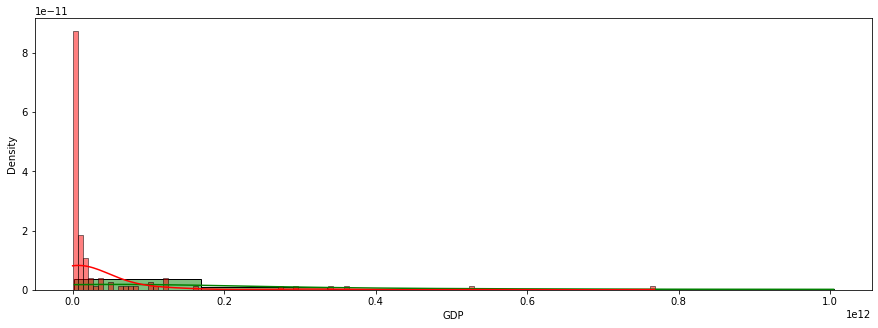

In [113]:
# plot the data
sns.histplot(df_dev_gdp, kde = True, stat = "density", color = 'green')
sns.histplot(df_ndev_gdp, kde = True, stat = "density", color = 'red')

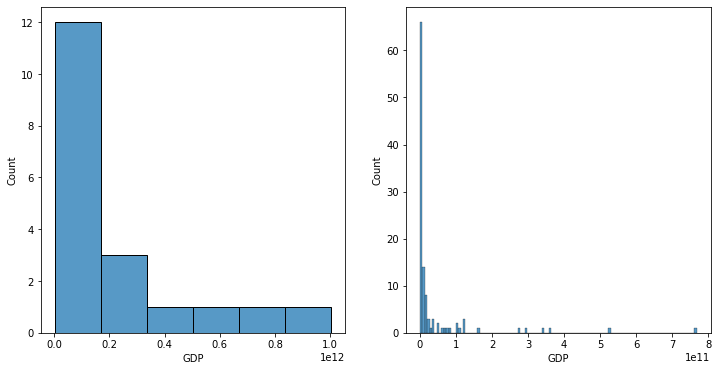

In [114]:
#Plot the means of the above distributions
#sns.kdeplot(means, linestyle="dotted")
thinkplot.PrePlot(2,1,2)
sns.histplot(df_dev_gdp)
thinkplot.SubPlot(2)
sns.histplot(df_ndev_gdp)
thinkplot.Config()

In [115]:
# the data in that non-developed countries has some errors. 
# The density is way out of other countries and developed countries.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [116]:
#Get some basic stats and save them in varaibles.
#mean, standard dev, median, and count. 

# developed countries.
dfmean_dev = df_dev_gdp.mean()
dfmed_dev = df_dev_gdp.median()
dfstd_dev = df_dev_gdp.std()
dfn_dev = df_dev_gdp.count()

print("Mean:", dfmean_dev)
print("median:", dfmed_dev)
print("Standard Deviation:", dfstd_dev)
print("Count:", dfn_dev)

Mean: 191219173390.6947
median: 44433437967.77187
Standard Deviation: 276341474532.1313
Count: 19


In [117]:
# non-developed countries
dfmean_ndev = df_ndev_gdp.mean()
dfmed_ndev = df_ndev_gdp.median()
dfstd_ndev = df_ndev_gdp.std()
dfn_ndev = df_ndev_gdp.count()

print("Mean:", dfmean_ndev)
print("median:", dfmed_ndev)
print("Standard Deviation:", dfstd_ndev)
print("Count:", dfn_ndev)

Mean: 38401794448.7334
median: 3939109674.197054
Standard Deviation: 104873088330.11647
Count: 114


In [118]:
# for developed countries, the strongest correlations with Life expectancy are: Adult Mortality, GDP, GDP_capita.
df_dev_corr = df_dev.corr()
df_dev_corr

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita
isDeveloped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifeexpectancy,NaN,1.000000,-0.899359,-0.057183,-0.171770,-0.444695,-0.086277,0.199851,-0.017819,0.034499,-0.158312,0.490596,0.287785,0.418105,0.620499
AdultMortality,NaN,-0.899359,1.000000,0.216727,-0.005333,0.334286,0.178315,-0.165426,0.183252,-0.022663,0.093680,-0.344043,-0.148966,-0.289023,-0.496477
infantdeaths,NaN,-0.057183,0.216727,1.000000,-0.221295,0.135308,0.719403,0.157665,0.986796,0.207134,0.049995,0.593179,0.781328,0.085720,-0.119084
Alcohol,NaN,-0.171770,-0.005333,-0.221295,1.000000,0.367880,-0.158748,-0.683514,-0.180704,-0.279539,-0.200160,-0.098270,-0.114638,0.045575,0.045979
HepatitisB,NaN,-0.444695,0.334286,0.135308,0.367880,1.000000,0.154259,-0.112131,0.122126,-0.160261,-0.053976,-0.200392,-0.019519,-0.261785,-0.247542
Measles,NaN,-0.086277,0.178315,0.719403,-0.158748,0.154259,1.000000,0.135037,0.695488,0.125403,-0.094813,0.589533,0.663181,-0.099393,-0.140021
BMI,NaN,0.199851,-0.165426,0.157665,-0.683514,-0.112131,0.135037,1.000000,0.121869,-0.120159,-0.210684,0.172690,0.187751,0.043819,-0.019945
under-fivedeaths,NaN,-0.017819,0.183252,0.986796,-0.180704,0.122126,0.695488,0.121869,1.000000,0.218049,0.043426,0.601390,0.783733,0.142210,-0.125629
Polio,NaN,0.034499,-0.022663,0.207134,-0.279539,-0.160261,0.125403,-0.120159,0.218049,1.000000,0.906284,0.042553,0.185185,-0.400674,-0.280103


In [119]:
# for non-developed countries, the strongest correlations with Life expectancy are: Adult Mortality, BMI, Schooling.
df_ndev_corr = df_ndev.corr()
df_ndev_corr

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita
isDeveloped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifeexpectancy,NaN,1.000000,-0.854801,-0.130055,0.234216,0.315167,-0.123550,0.704622,-0.159256,0.585020,0.588198,0.266061,-0.004356,0.723746,0.516382
AdultMortality,NaN,-0.854801,1.000000,0.012137,-0.038327,-0.148156,0.003598,-0.546226,0.032772,-0.362824,-0.337636,-0.177797,-0.044995,-0.453928,-0.351728
infantdeaths,NaN,-0.130055,0.012137,1.000000,-0.052514,-0.296759,0.727416,-0.263817,0.996890,-0.201312,-0.193709,0.248851,0.911464,-0.172519,-0.113801
Alcohol,NaN,0.234216,-0.038327,-0.052514,1.000000,0.024648,0.022499,0.366599,-0.044058,0.256422,0.238434,0.396137,-0.005090,0.529299,0.486238
HepatitisB,NaN,0.315167,-0.148156,-0.296759,0.024648,1.000000,-0.240508,0.199874,-0.311084,0.765539,0.779146,-0.129230,-0.226902,0.329309,-0.035143
Measles,NaN,-0.123550,0.003598,0.727416,0.022499,-0.240508,1.000000,-0.271247,0.736332,-0.176616,-0.172881,0.148702,0.523256,-0.138020,-0.103945
BMI,NaN,0.704622,-0.546226,-0.263817,0.366599,0.199874,-0.271247,1.000000,-0.277293,0.411563,0.396070,0.202398,-0.137967,0.716359,0.445144
under-fivedeaths,NaN,-0.159256,0.032772,0.996890,-0.044058,-0.311084,0.736332,-0.277293,1.000000,-0.229461,-0.222606,0.238658,0.896368,-0.191765,-0.120244
Polio,NaN,0.585020,-0.362824,-0.201312,0.256422,0.765539,-0.176616,0.411563,-0.229461,1.000000,0.944835,0.169334,-0.087584,0.592896,0.305883


based on this data in the developed countries, the strongest correlations are Adult Mortality, GDP, and GDP_capita.
From my understanding, there are a lot of evaluations to calculate life expectancy. However, GDP is one of the most important aspects of life expectancy.

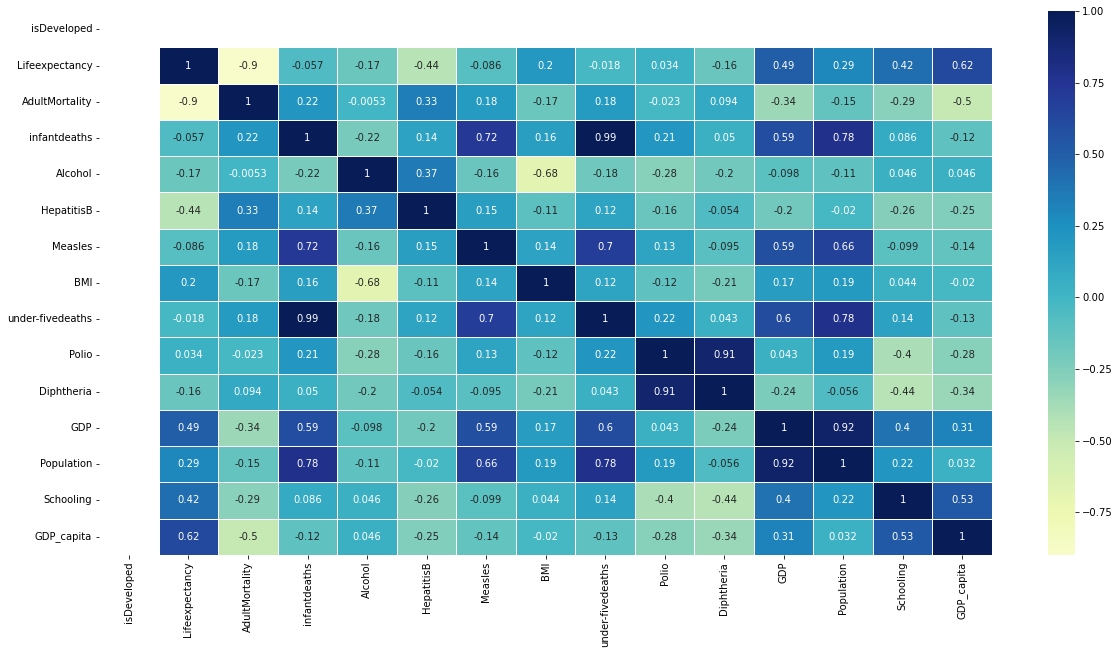

In [120]:
# heatmap for developed countries.
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_dev_corr, dtype=bool))
sns.heatmap(df_dev_corr, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True)
plt.show()

Based on these data from developing countries, the strongest associations were for adult mortality, BMI, and schooling.
If they had a lower BMI value, the adult mortality rate must be lower than in developed countries. I think it's related.

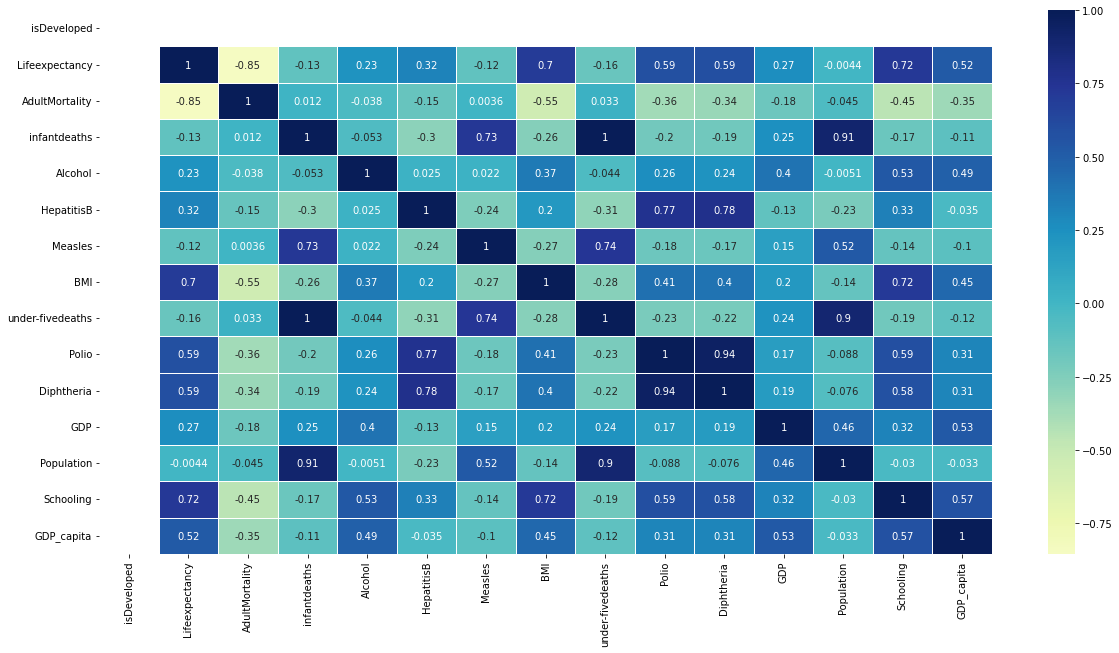

In [121]:
# heatmap for non-developed countries.
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_ndev_corr, dtype=bool))
sns.heatmap(df_ndev_corr, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True)
plt.show()